In [61]:
import numpy as np
from scipy.linalg import solve_discrete_lyapunov
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline
from msmbuilder.example_datasets import AlanineDipeptide
trajs = AlanineDipeptide().get().trajectories
from matplotlib import cm

from msmbuilder.featurizer import AtomPairsFeaturizer
pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((j,i))
X = AtomPairsFeaturizer(pairs).fit_transform(trajs)

from msmbuilder.featurizer import DihedralFeaturizer
Y = DihedralFeaturizer().fit_transform(trajs)

lag = 1

# for i in range(len(X)):
#     X[i] = np.insert(X[i], len(X[i][0]), 1.0, axis=1)
# for i in range(len(Y)):
#     Y[i] = np.insert(Y[i], len(Y[i][0]), 1.0, axis=1)

epsilon = .1

X_pca = decomposition.PCA(whiten=True, n_components = 1-epsilon)
X_pca.fit(np.vstack(X))
X_whitened = [X_pca.transform(x) for x in X]




X_0 = np.vstack([x[:-lag] for x in X_whitened])
X_tau = np.vstack([x[lag:] for x in X_whitened])

X_0 = np.insert(X_0, len(X_0[0]), 1, axis=1)
X_tau = np.insert(X_tau, len(X_tau[0]), 1, axis=1)

K_xx_tuple = np.linalg.lstsq(X_0, X_tau)
K_xx = K_xx_tuple[0]

Y_pca = decomposition.PCA(whiten=True, n_components = 1-epsilon)
Y_pca.fit(np.vstack(Y))
Y_whitened = [Y_pca.transform(y) for y in Y]

Y_0 = np.vstack([y[:-lag] for y in Y_whitened])
Y_tau = np.vstack([y[lag:] for y in Y_whitened])
                  
Y_0 = np.insert(Y_0, len(Y_0[0]), 1, axis=1)
Y_tau = np.insert(Y_tau, len(Y_tau[0]), 1, axis=1)

K_xy_tuple = np.linalg.lstsq(X_0, Y_tau)
K_xy = K_xy_tuple[0]

s = np.linalg.svd(K_xy, compute_uv=False)


alanine_dipeptide already is cached


In [62]:
print(np.linalg.eigvalsh(K_xx))
v_x = np.linalg.eigh(K_xx)[1][-1]
chi_bar = np.vstack(X_whitened).mean(0)
gamma_bar = np.vstack(Y_whitened).mean(0)

print(len(chi_bar))

chi_bar = np.insert(chi_bar, len(chi_bar), 1)
gamma_bar = np.insert(gamma_bar, len(gamma_bar), 1)

print(len(chi_bar))


A = K_xx - np.outer(v_x, chi_bar)
B = K_xy - np.outer(v_x, gamma_bar)

Q = np.dot(B, B.T)


[ 0.40009266  0.43621731  0.4422051   0.5087564   0.51387447  0.56732213
  0.77059698  0.92800665  0.93583566  0.96580726  1.00000048]
10
11


In [63]:
O = solve_discrete_lyapunov(A, Q)


In [64]:
u, s, v = np.linalg.svd(O)


In [65]:
X_transformed = np.dot(X_0, u)


Text(0.5,1,'projection onto first two observable tICs')

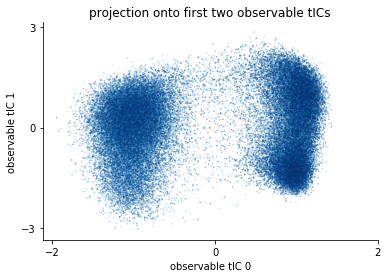

In [66]:
ax = plt.subplot(111)
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=range(len(X_transformed[:,0])), cmap=cm.Blues, s=.1,alpha=0.75)
plt.xlabel('observable tIC 0')
plt.ylabel('observable tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
plt.title('projection onto first two observable tICs')

<class 'int'>


Text(0,0.5,'observable tIC1')

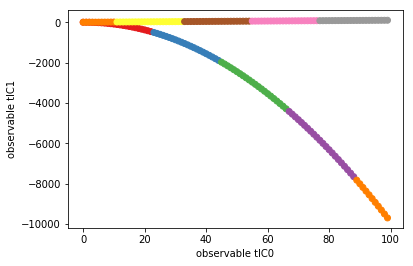

In [81]:
ax = plt.subplot(111)
import random
a = list(range(200))
# a.reverse()
print(type(a[0]))
arr = np.array(range(100))
x = list(range(100))
x.extend(list(range(100)))
y = list(range(100)-arr*arr)
y.extend(list(range(100)))
plt.scatter(x, y, c=a, cmap=cm.Set1, alpha=1)

ax.set_xlabel('observable tIC0')
ax.set_ylabel('observable tIC1')
